# **Business Problem**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Agenda**



* Business Problem
* Get The Data
* Discover and Visualize the Data to Gain Insights
* Prepare the Data for Machine Learning Algorithms
* Select a Model and Train It
* Fine-Tune Your Model
* Save Model

# Load Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Areej Projects/Student Marks Prediction/student_info.csv")

In [ ]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.shape

(200, 2)

# **Gain Information about Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


# **Descriptive analysis**

In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# **Visual Analysis**

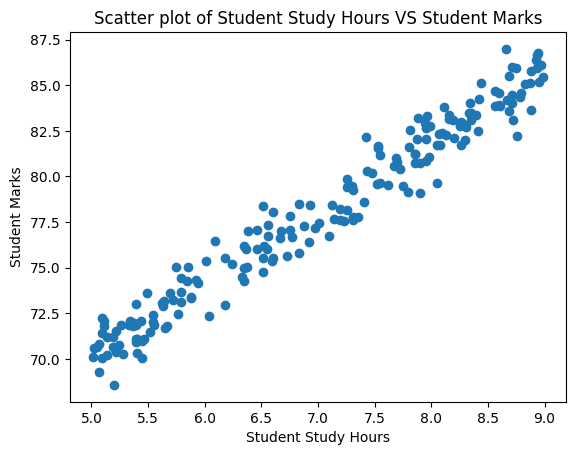

In [ ]:
plt.scatter(x=df.study_hours,y=df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Scatter plot of Student Study Hours VS Student Marks")
plt.show()

# **Check Null Values**

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

Find 5 Null Values in Study Hours Feature

In [ ]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [ ]:
df2=df.fillna(df.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

# **Split Data**

In [ ]:
X=df2.drop("student_marks",axis=1)
y=df2.drop("study_hours",axis=1)
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (200, 1)
Shape of y:  (200, 1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (160, 1)
Shape of y_train:  (160, 1)
Shape of X_test:  (40, 1)
Shape of y_test:  (40, 1)


# **Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[3.93571802]])

In [ ]:
lr.intercept_

array([50.44735504])

In [ ]:
lr.predict([[4]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [ ]:
y_predict=lr.predict(X_test)
y_predict

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [ ]:
pd.DataFrame(np.c_[X_test,y_test,y_predict],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


# **Fine_Tune Model**

In [ ]:
lr.score(X_test,y_test)

0.9514124242154466

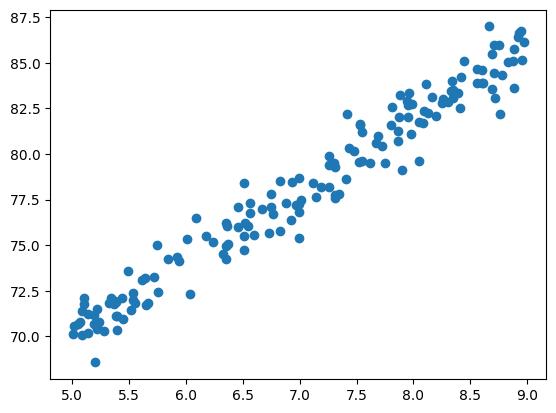

In [ ]:
plt.scatter(X_train,y_train)

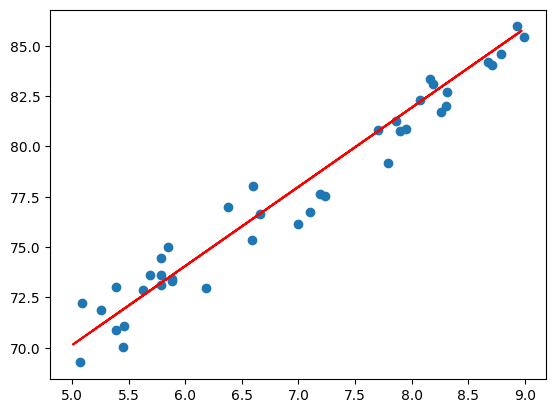

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="r")

# **Present Solution**

# **Save ML Model**

In [ ]:
import joblib
#joblib.dump(lr,"AAtudent_mark_predictor.pkl")
joblib.dump(lr,"/content/drive/MyDrive/Areej Projects/student_mark_predictor.pkl")


['/content/drive/MyDrive/Areej Projects/student_mark_predictor.pkl']

In [ ]:
model=joblib.load("AAtudent_mark_predictor.pkl")

In [ ]:
model.predict([[5]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


70.12594512018406